In [1]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing Data
streamingdata = pd.read_csv("C:/Users/ssnip/OneDrive/Data Science/Final Project/Data/All Streaming Data 1.29.23.csv")

In [3]:
streamingdata.head(3)

,platform,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,...,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10
0,Disney,tm19438,The Princess Bride,MOVIE,"In this enchantingly cracked fairy tale, the b...",1987,PG,99,"fantasy, family, romance",['US'],...,fantasy,family,romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Disney,ts20711,The Simpsons,SHOW,The satiric adventures of a working-class fami...,1989,TV-14,27,"animation, comedy",['US'],...,animation,comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Disney,ts15377,America's Funniest Home Videos,SHOW,America's Funniest Home Videos is the longest-...,1989,TV-PG,49,"animation, reality, comedy",['US'],...,animation,reality,comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Reviewing Count of Data
streamingdata.count()

platform                19654
id                      19654
title                   19653
type                    19654
description             19498
release_year            19654
age_certification        9538
runtime                 19654
genres                  19654
production_countries    19654
seasons                  5208
imdb_id                 18047
imdb_score              17558
imdb_votes              17528
tmdb_popularity         18955
tmdb_score              16992
genre1                  19654
genre2                  13794
genre3                   8309
genre4                   4000
genre5                   1695
genre6                    620
genre7                    218
genre8                     67
genre9                     18
genre10                     2
dtype: int64

In [5]:
#Recode genre1 to genre for categorical analysis
def genre (series):
  if series == "genre1":
    return "0"
  if series == "action": 
    return "1"
  if series == "animation": 
    return "2"
  if series == "comedy":
    return "3"
  if series == "crime":
    return "4"
  if series == "documentation":
    return "5"
  if series == "drama":
    return "6"
  if series == "european":
    return "7"    
  if series == "family":
    return "8"
  if series == "fantasy":
    return "9"
  if series == "history":
    return "10"
  if series == "horror":
    return "11"
  if series == "music":
    return "12"
  if series == "reality":
    return "13"
  if series == "romance":
    return "14"
  if series == "scifi":
    return "15"
  if series == "sport":
    return "16"
  if series == "thriller":
    return "17"
  if series == "war":
    return "18"
  if series == "western":
    return "19"
  if series == "None":
    return "20"    
streamingdata["genre"] = streamingdata["genre1"].apply(genre)

In [6]:
#Reviewing counts of genre
streamingdata.genre.value_counts()

6     4645
3     3655
5     1993
17    1662
1     1126
2     1092
15     949
14     824
11     813
4      611
9      491
13     473
19     448
12     183
8      134
18     116
10      84
16      29
7        6
Name: genre, dtype: int64

In [7]:
#Recode type to program_type for categorical dtype for Shows and Movies
def program_type (series):
  if series == "type":
    return "0"
  if series == "SHOW": 
    return "1"
  if series == "MOVIE": 
    return "2"
streamingdata["program_type"] = streamingdata["type"].apply(program_type)

In [8]:
#Recode platform to Platform for categorical dtype for Netflix, Amazon, Disney and Hulu
def Platform (series):
  if series == "platform":
    return "0"
  if series == "Netflix": 
    return "1"
  if series == "Disney": 
    return "2"
  if series == "Hulu":
    return "3"
  if series == "Amazon":
    return "4"
streamingdata["Platform"] = streamingdata["platform"].apply(Platform)

In [9]:
#creating decade from release year
def decade (series):
  if series == "release_year":
    return 0
  if series <= 1969: 
    return 1
  if series <= 1979: 
    return 2
  if series <= 1989:
    return 3
  if series <= 1999:
    return 4
  if series <= 2009:
    return 5
  if series <= 2019:
    return 6
  if series <= 2029:
    return 7
streamingdata["decade"] = streamingdata["release_year"].apply(decade)

In [10]:
print(streamingdata.dtypes)

platform                 object
id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
genre1                   object
genre2                   object
genre3                   object
genre4                   object
genre5                   object
genre6                   object
genre7                   object
genre8                   object
genre9                   object
genre10                  object
genre                    object
program_type             object
Platform                 object
decade                    int64
dtype: object


In [11]:
sd1 = streamingdata.drop(['platform','title','type', 'description', 'age_certification', 'genres', 
                        'production_countries','seasons','genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 
                        'genre7','genre8', 'genre9', 'genre10'], axis=1)

In [12]:
print(sd1.dtypes)

id                  object
release_year         int64
runtime              int64
imdb_id             object
imdb_score         float64
imdb_votes         float64
tmdb_popularity    float64
tmdb_score         float64
genre               object
program_type        object
Platform            object
decade               int64
dtype: object


In [13]:
import numpy as np

In [14]:
sd1.isnull().sum()

id                    0
release_year          0
runtime               0
imdb_id            1607
imdb_score         2096
imdb_votes         2126
tmdb_popularity     699
tmdb_score         2662
genre               320
program_type          0
Platform              0
decade                0
dtype: int64

In [15]:
sd1.dropna(inplace=True)

In [16]:
sd1.count()

id                 15588
release_year       15588
runtime            15588
imdb_id            15588
imdb_score         15588
imdb_votes         15588
tmdb_popularity    15588
tmdb_score         15588
genre              15588
program_type       15588
Platform           15588
decade             15588
dtype: int64

In [17]:
sd1.loc[:, 'tmdb_score'].mean()

6.447296510136002

In [18]:
#recoding score
def Rating (series):
  if series == "tmdb_score":
    return "0"
  if series <= 6.4: 
    return "Negative"
  if series >= 6.5: 
    return "Positive"
sd1["Rating"] = sd1["tmdb_score"].apply(Rating)

In [19]:
def Rating1 (series):
  if series == "Rating":
    return "0"
  if series == "Positive": 
    return 1
  if series == "Negative":
    return 2
sd1["Rating1"] = sd1["Rating"].apply(Rating1)

In [20]:
sd1.head()

,id,release_year,runtime,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,program_type,Platform,decade,Rating,Rating1
0,tm19438,1987,99,tt0093779,8.0,420521.0,21.284,7.7,9,2,2,3,Positive,1.0
1,ts20711,1989,27,tt0096697,8.7,394764.0,516.381,7.9,2,1,2,3,Positive,1.0
2,ts15377,1989,49,tt0098740,6.2,5356.0,18.117,7.0,2,1,2,3,Positive,1.0
3,ts22130,1998,21,tt0172049,6.3,2861.0,8.697,6.8,2,1,2,4,Positive,1.0
4,tm38852,2008,86,tt0451079,6.8,138363.0,37.730,6.5,9,2,2,5,Positive,1.0


In [21]:
#changing datatypes for columns into integers
sd1['genre'] = sd1['genre'].astype(int)

In [22]:
sd1.genre.value_counts()

6     3799
3     3048
17    1442
5     1369
1      948
15     862
14     723
2      722
11     657
4      528
9      420
13     363
19     323
12     119
18      98
8       85
10      64
16      15
7        3
Name: genre, dtype: int64

In [23]:
sd1.groupby('Rating1')['genre'].count()

Rating1
1.0    8234
2.0    7345
Name: genre, dtype: int64

In [24]:
print(sd1.dtypes)

id                  object
release_year         int64
runtime              int64
imdb_id             object
imdb_score         float64
imdb_votes         float64
tmdb_popularity    float64
tmdb_score         float64
genre                int32
program_type        object
Platform            object
decade               int64
Rating              object
Rating1            float64
dtype: object


In [25]:
sd1['program_type'] = sd1['program_type'].astype(int)
sd1['Platform'] = sd1['Platform'].astype(int)

In [26]:
print(sd1.dtypes)

id                  object
release_year         int64
runtime              int64
imdb_id             object
imdb_score         float64
imdb_votes         float64
tmdb_popularity    float64
tmdb_score         float64
genre                int32
program_type         int32
Platform             int32
decade               int64
Rating              object
Rating1            float64
dtype: object


In [27]:
sd1.head()


,id,release_year,runtime,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,program_type,Platform,decade,Rating,Rating1
0,tm19438,1987,99,tt0093779,8.0,420521.0,21.284,7.7,9,2,2,3,Positive,1.0
1,ts20711,1989,27,tt0096697,8.7,394764.0,516.381,7.9,2,1,2,3,Positive,1.0
2,ts15377,1989,49,tt0098740,6.2,5356.0,18.117,7.0,2,1,2,3,Positive,1.0
3,ts22130,1998,21,tt0172049,6.3,2861.0,8.697,6.8,2,1,2,4,Positive,1.0
4,tm38852,2008,86,tt0451079,6.8,138363.0,37.730,6.5,9,2,2,5,Positive,1.0


In [28]:
sd1.count()

id                 15588
release_year       15588
runtime            15588
imdb_id            15588
imdb_score         15588
imdb_votes         15588
tmdb_popularity    15588
tmdb_score         15588
genre              15588
program_type       15588
Platform           15588
decade             15588
Rating             15579
Rating1            15579
dtype: int64

In [29]:
sd1.isnull().sum()

id                 0
release_year       0
runtime            0
imdb_id            0
imdb_score         0
imdb_votes         0
tmdb_popularity    0
tmdb_score         0
genre              0
program_type       0
Platform           0
decade             0
Rating             9
Rating1            9
dtype: int64

In [30]:
sd1.dropna(inplace=True)

In [31]:
sd1.isnull().sum()

id                 0
release_year       0
runtime            0
imdb_id            0
imdb_score         0
imdb_votes         0
tmdb_popularity    0
tmdb_score         0
genre              0
program_type       0
Platform           0
decade             0
Rating             0
Rating1            0
dtype: int64

In [32]:
corr = sd1.corr()
corr.style.background_gradient(cmap='coolwarm')

,release_year,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,program_type,Platform,decade,Rating1
release_year,1.000000,-0.035636,0.067963,0.000169,0.056264,0.199482,-0.137884,-0.199170,-0.339606,0.958537,-0.191806
runtime,-0.035636,1.000000,-0.183223,0.138725,-0.028728,-0.260109,0.128575,0.756505,0.119860,-0.060715,0.228967
imdb_score,0.067963,-0.183223,1.000000,0.212218,0.067139,0.613770,-0.154083,-0.379562,-0.198610,0.055373,-0.568131
imdb_votes,0.000169,0.138725,0.212218,1.000000,0.186953,0.145011,0.035042,0.030750,-0.090484,-0.017158,-0.151140
tmdb_popularity,0.056264,-0.028728,0.067139,0.186953,1.000000,0.095421,-0.002367,-0.073076,-0.074693,0.065989,-0.081983
tmdb_score,0.199482,-0.260109,0.613770,0.145011,0.095421,1.000000,-0.141116,-0.432535,-0.272810,0.197989,-0.761495
genre,-0.137884,0.128575,-0.154083,0.035042,-0.002367,-0.141116,1.000000,0.108362,0.160913,-0.127561,0.138970
program_type,-0.199170,0.756505,-0.379562,0.030750,-0.073076,-0.432535,0.108362,1.000000,0.223734,-0.200172,0.396433
Platform,-0.339606,0.119860,-0.198610,-0.090484,-0.074693,-0.272810,0.160913,0.223734,1.000000,-0.346085,0.255800
decade,0.958537,-0.060715,0.055373,-0.017158,0.065989,0.197989,-0.127561,-0.200172,-0.346085,1.000000,-0.188389


C:\Python3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, 'TMDB Score')

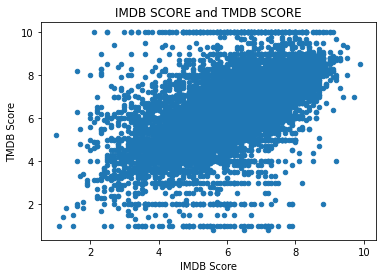

In [33]:
#Scatterplot of number of tmdb score and imdb score
Plot = sd1.plot.scatter(x='imdb_score', y='tmdb_score')
Plot.set_title("IMDB SCORE and TMDB SCORE")
Plot.set_xlabel("IMDB Score")
Plot.set_ylabel("TMDB Score")

Text(0, 0.5, 'TMDB Score')

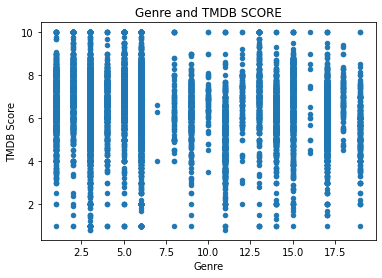

In [34]:
#tmdb score and genre
Plot = sd1.plot.scatter(x='genre', y='tmdb_score')
Plot.set_title("Genre and TMDB SCORE")
Plot.set_xlabel("Genre")
Plot.set_ylabel("TMDB Score")

In [35]:
tmdb_score = sd1[['genre', 'tmdb_score']]
imdb_scores = sd1[['genre', 'imdb_score']]

<AxesSubplot: >

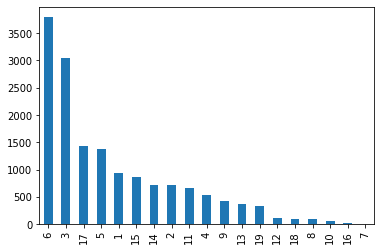

In [36]:
tmdb_score['genre'].value_counts().plot(kind='bar')

In [37]:
streamingdata.platform.value_counts()

Amazon     9871
Netflix    5850
Hulu       2398
Disney     1535
Name: platform, dtype: int64

In [38]:
amazon_df = streamingdata.loc[streamingdata['platform'] == 'Amazon']

In [39]:
amazon_df.head()

,platform,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,...,genre5,genre6,genre7,genre8,genre9,genre10,genre,program_type,Platform,decade
30,Amazon,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,western,['US'],...,NaN,NaN,NaN,NaN,NaN,NaN,19,2,4,1
31,Amazon,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,western,['US'],...,NaN,NaN,NaN,NaN,NaN,NaN,19,2,4,1
32,Amazon,tm66674,Dynamite,MOVIE,Two members of a dynamite crew--a rugged veter...,1949,NaN,68,"drama, crime",['US'],...,NaN,NaN,NaN,NaN,NaN,NaN,6,2,4,1
33,Amazon,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,NaN,68,"drama, romance",['US'],...,NaN,NaN,NaN,NaN,NaN,NaN,6,2,4,1
34,Amazon,tm66674,Dynamite,MOVIE,Two members of a dynamite crew--a rugged veter...,1949,NaN,68,"drama, crime",['US'],...,NaN,NaN,NaN,NaN,NaN,NaN,6,2,4,1


In [40]:
hulu_df = streamingdata.loc[streamingdata['platform'] == 'Hulu']
netflix_df = streamingdata.loc[streamingdata['platform'] == 'Netflix']
disney_df = streamingdata.loc[streamingdata['platform'] == 'Disney']

In [41]:
hulu_df.head()

,platform,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,...,genre5,genre6,genre7,genre8,genre9,genre10,genre,program_type,Platform,decade
528,Hulu,ts20005,I Love Lucy,SHOW,Cuban Bandleader Ricky Ricardo would be happy ...,1951,TV-G,30,"comedy, family",['US'],...,NaN,NaN,NaN,NaN,NaN,NaN,3,1,3,1
529,Hulu,ts20690,The Lucy Show,SHOW,The Lucy Show is an American sitcom that aired...,1962,NaN,30,comedy,['US'],...,NaN,NaN,NaN,NaN,NaN,NaN,3,1,3,1
530,Hulu,tm19438,The Princess Bride,MOVIE,"In this enchantingly cracked fairy tale, the b...",1987,PG,99,"fantasy, family, romance",['US'],...,NaN,NaN,NaN,NaN,NaN,NaN,9,2,3,3
531,Hulu,ts20711,The Simpsons,SHOW,The satiric adventures of a working-class fami...,1989,TV-14,27,"animation, comedy",['US'],...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,3,3
532,Hulu,tm180542,Once Upon a Time in America,MOVIE,A former Prohibition-era Jewish gangster retur...,1984,R,229,"drama, crime, european","['US', 'IT']",...,NaN,NaN,NaN,NaN,NaN,NaN,6,2,3,3


In [42]:
pd.options.display.max_columns = None

In [43]:
hulu_df.tmdb_score.value_counts()

7.0    95
7.5    94
7.8    77
6.0    76
6.4    75
       ..
9.6     1
9.8     1
3.2     1
3.1     1
1.5     1
Name: tmdb_score, Length: 74, dtype: int64

In [44]:
hulu1 = hulu_df.drop(['description', 'age_certification', 'genres', 'production_countries','seasons','genre1', 
                      'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 
                      'genre7','genre8', 'genre9', 'genre10'], axis=1)
netflix1 = netflix_df.drop(['description', 'age_certification', 'genres', 'production_countries','seasons','genre1', 
                      'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 
                      'genre7','genre8', 'genre9', 'genre10'], axis=1)
disney1 = disney_df.drop(['description', 'age_certification', 'genres', 'production_countries','seasons','genre1', 
                      'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 
                      'genre7','genre8', 'genre9', 'genre10'], axis=1)
amazon1 = amazon_df.drop(['description', 'age_certification', 'genres', 'production_countries','seasons','genre1', 
                      'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 
                      'genre7','genre8', 'genre9', 'genre10'], axis=1)

In [45]:
hulu2 = hulu_df.drop(['description', 'age_certification', 'genres', 'production_countries','seasons','genre1', 
                      'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 
                      'genre7','genre8', 'genre9', 'genre10'], axis=1)

In [46]:
hulu2.count()

platform           2398
id                 2398
title              2398
type               2398
release_year       2398
runtime            2398
imdb_id            2263
imdb_score         2232
imdb_votes         2231
tmdb_popularity    2348
tmdb_score         2238
genre              2374
program_type       2398
Platform           2398
decade             2398
dtype: int64

In [47]:
hulu2.isnull().sum()

platform             0
id                   0
title                0
type                 0
release_year         0
runtime              0
imdb_id            135
imdb_score         166
imdb_votes         167
tmdb_popularity     50
tmdb_score         160
genre               24
program_type         0
Platform             0
decade               0
dtype: int64

In [48]:
hulu2.dropna(inplace=True)

In [49]:
hulu2.count()

platform           2101
id                 2101
title              2101
type               2101
release_year       2101
runtime            2101
imdb_id            2101
imdb_score         2101
imdb_votes         2101
tmdb_popularity    2101
tmdb_score         2101
genre              2101
program_type       2101
Platform           2101
decade             2101
dtype: int64

In [50]:
print(hulu2.dtypes)

platform            object
id                  object
title               object
type                object
release_year         int64
runtime              int64
imdb_id             object
imdb_score         float64
imdb_votes         float64
tmdb_popularity    float64
tmdb_score         float64
genre               object
program_type        object
Platform            object
decade               int64
dtype: object


In [51]:
hulu2['tmdb_score'] = hulu2['tmdb_score'].astype(float)

In [52]:
hulu2_avg = hulu2.groupby('genre')['tmdb_score'].mean()

<AxesSubplot: xlabel='genre'>

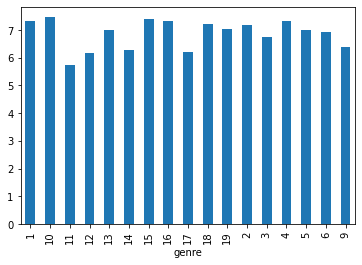

In [53]:
hulu2_avg.plot(kind='bar')

In [54]:
hulu1.count()
amazon1.count()
netflix1.count()
disney1.count()

platform           1535
id                 1535
title              1535
type               1535
release_year       1535
runtime            1535
imdb_id            1133
imdb_score         1108
imdb_votes         1105
tmdb_popularity    1524
tmdb_score         1426
genre              1507
program_type       1535
Platform           1535
decade             1535
dtype: int64

In [55]:
hulu1.dropna(inplace=True)
netflix1.dropna(inplace=True)
amazon1.dropna(inplace=True)
disney1.dropna(inplace=True)

In [56]:
print(hulu1.dtypes)

platform            object
id                  object
title               object
type                object
release_year         int64
runtime              int64
imdb_id             object
imdb_score         float64
imdb_votes         float64
tmdb_popularity    float64
tmdb_score         float64
genre               object
program_type        object
Platform            object
decade               int64
dtype: object


In [57]:
hulu1.count()

platform           2101
id                 2101
title              2101
type               2101
release_year       2101
runtime            2101
imdb_id            2101
imdb_score         2101
imdb_votes         2101
tmdb_popularity    2101
tmdb_score         2101
genre              2101
program_type       2101
Platform           2101
decade             2101
dtype: int64

In [58]:
hulu1.head()

,platform,id,title,type,release_year,runtime,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,program_type,Platform,decade
528,Hulu,ts20005,I Love Lucy,SHOW,1951,30,tt0043208,8.5,25944.0,17.088,8.1,3,1,3,1
529,Hulu,ts20690,The Lucy Show,SHOW,1962,30,tt0055686,7.2,2797.0,8.858,7.5,3,1,3,1
530,Hulu,tm19438,The Princess Bride,MOVIE,1987,99,tt0093779,8.0,420521.0,21.284,7.7,9,2,3,3
531,Hulu,ts20711,The Simpsons,SHOW,1989,27,tt0096697,8.7,394764.0,516.381,7.9,2,1,3,3
532,Hulu,tm180542,Once Upon a Time in America,MOVIE,1984,229,tt0087843,8.3,342335.0,21.322,8.4,6,2,3,3


In [59]:
disney1['genre'] = disney1['genre'].astype(int)
disney1['tmdb_score'] = disney1['tmdb_score'].astype(float)

In [60]:
disney_df.groupby('genre')['tmdb_score'].mean()

genre
1     7.165217
10    6.514286
11    6.900000
12    7.050000
13    7.526087
14    6.789189
15    7.110938
17    6.923077
18    8.400000
19    6.725000
2     6.743662
3     6.658844
4     7.375000
5     7.297143
6     6.909709
9     6.759740
Name: tmdb_score, dtype: float64

In [61]:
amazon1['genre'] = amazon1['genre'].astype(int)
amazon1['tmdb_score'] = amazon1['tmdb_score'].astype(float)

In [62]:
amazon_df.groupby('genre')['tmdb_score'].mean()

genre
1     5.970309
10    6.678125
11    5.032969
12    6.718333
13    7.055714
14    5.866820
15    5.939394
16    6.350000
17    5.621270
18    6.897674
19    5.320946
2     6.924026
3     5.975776
4     6.064113
5     6.824802
6     6.155075
7     5.850000
8     6.549425
9     5.796111
Name: tmdb_score, dtype: float64

In [63]:
netflix1['genre'] = netflix1['genre'].astype(int)
netflix1['tmdb_score'] = netflix1['tmdb_score'].astype(float)

In [64]:

netflix_avg = netflix_df.groupby('genre')['tmdb_score'].mean()


<AxesSubplot: xlabel='genre'>

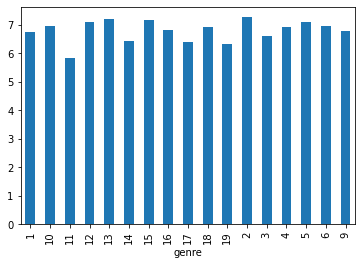

In [65]:
netflix_avg.plot(kind='bar')

In [66]:
amazon1['genre'] = amazon1['genre'].astype(int)
amazon1['tmdb_score'] = amazon1['tmdb_score'].astype(float)

In [67]:
amazon_avg = amazon_df.groupby('genre')['tmdb_score'].mean()

<AxesSubplot: xlabel='genre'>

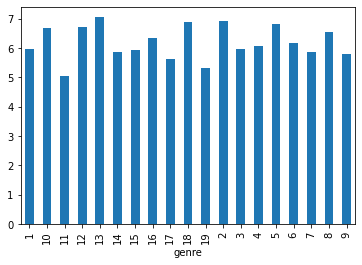

In [68]:
amazon_avg.plot(kind='bar')

In [69]:
disney1['genre'] = disney1['genre'].astype(int)
disney1['tmdb_score'] = disney1['tmdb_score'].astype(float)

In [70]:
disney_avg = disney_df.groupby('genre')['tmdb_score'].mean()

<AxesSubplot: xlabel='genre'>

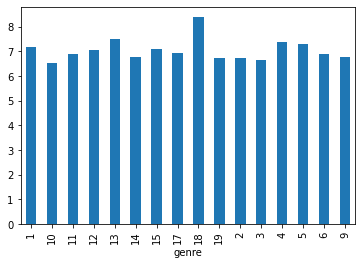

In [71]:
disney_avg.plot(kind='bar')

In [72]:
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

In [73]:
sd2 = sd1.drop(['id', 'runtime','release_year','imdb_id','imdb_score','imdb_votes','program_type','Rating'], axis=1)

In [74]:
sd2.head()

,tmdb_popularity,tmdb_score,genre,Platform,decade,Rating1
0,21.284,7.7,9,2,3,1.0
1,516.381,7.9,2,2,3,1.0
2,18.117,7.0,2,2,3,1.0
3,8.697,6.8,2,2,4,1.0
4,37.730,6.5,9,2,5,1.0


In [75]:
print(sd2.dtypes)

tmdb_popularity    float64
tmdb_score         float64
genre                int32
Platform             int32
decade               int64
Rating1            float64
dtype: object


In [76]:
kmeans = KMeans(n_clusters=15)
kmeans.fit(sd2)

KMeans(n_clusters=15)

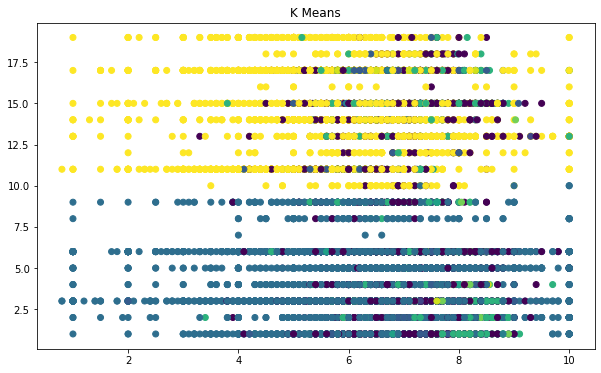

In [77]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(sd2['tmdb_score'], sd2['genre'], c=kmeans.labels_, cmap='viridis')

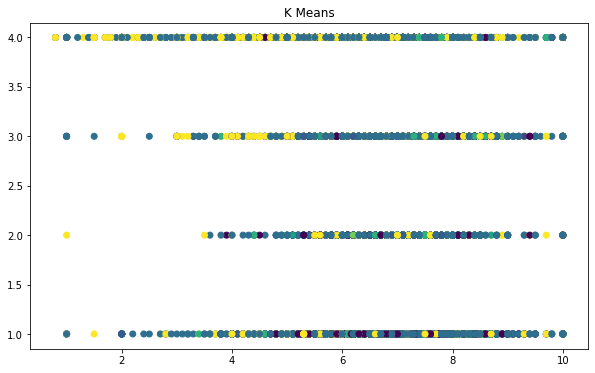

In [78]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(sd2['tmdb_score'], sd2['Platform'], c=kmeans.labels_, cmap='viridis')

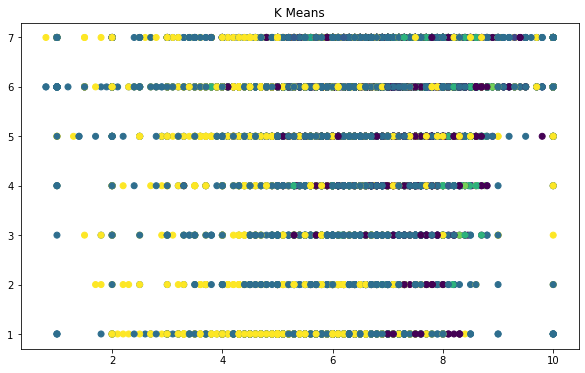

In [79]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(sd2['tmdb_score'], sd2['decade'], c=kmeans.labels_, cmap='viridis')

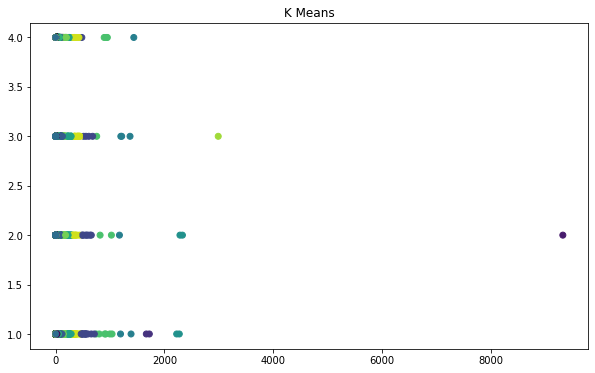

In [80]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(sd2['tmdb_popularity'], sd2['Platform'], c=kmeans.labels_, cmap='viridis')

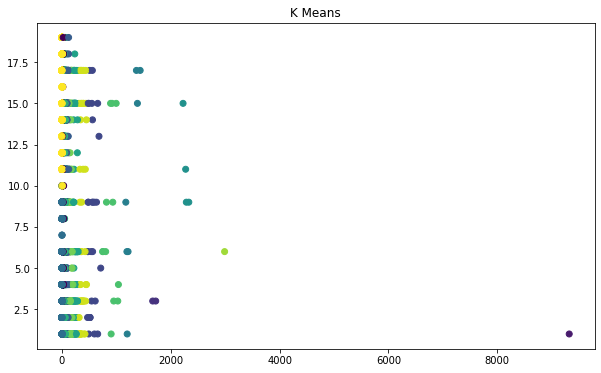

In [81]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(sd2['tmdb_popularity'], sd2['genre'], c=kmeans.labels_, cmap='viridis')

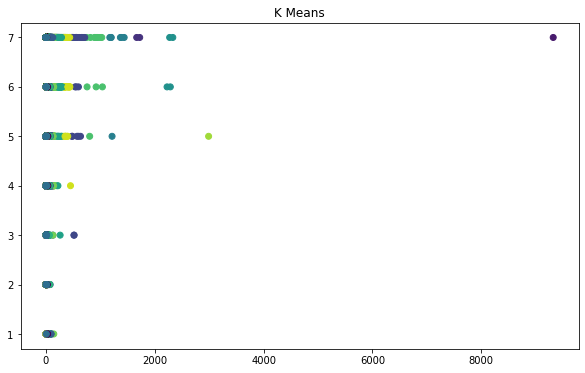

In [82]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(sd2['tmdb_popularity'], sd2['decade'], c=kmeans.labels_, cmap='viridis')

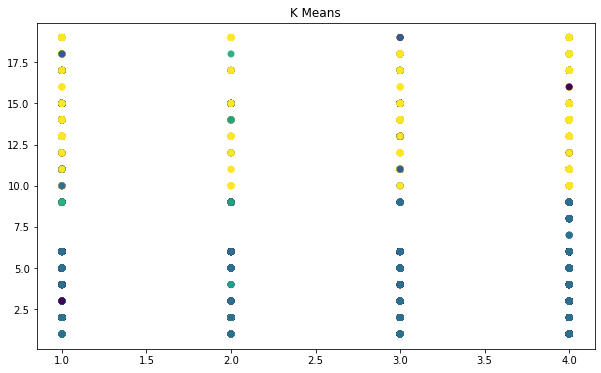

In [83]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(sd2['Platform'], sd2['genre'], c=kmeans.labels_, cmap='viridis')

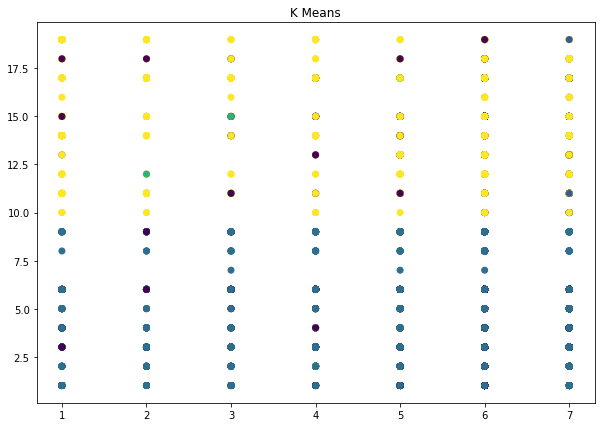

In [84]:
plt.figure(figsize=(10,7))
plt.title('K Means')
plt.scatter(sd2['decade'], sd2['genre'], c=kmeans.labels_, cmap='viridis')

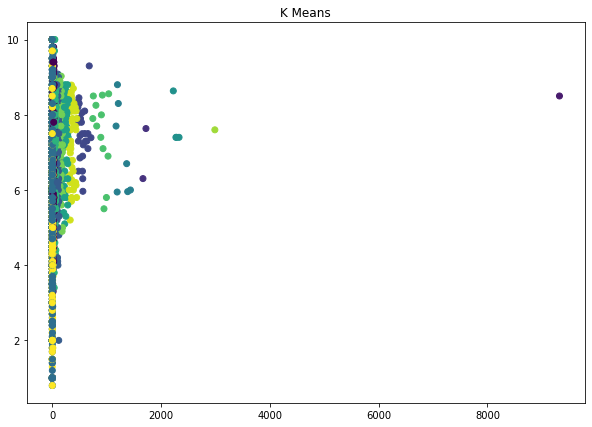

In [85]:
plt.figure(figsize=(10,7))
plt.title('K Means')
plt.scatter(sd2['tmdb_popularity'], sd2['tmdb_score'], c=kmeans.labels_, cmap='viridis')

In [86]:
sd2['Category'] = kmeans.labels_

In [87]:
sd2.head()

,tmdb_popularity,tmdb_score,genre,Platform,decade,Rating1,Category
0,21.284,7.7,9,2,3,1.0,0
1,516.381,7.9,2,2,3,1.0,3
2,18.117,7.0,2,2,3,1.0,0
3,8.697,6.8,2,2,4,1.0,5
4,37.730,6.5,9,2,5,1.0,9


In [88]:
sd2.Category.value_counts()

5     8335
14    3555
0     2219
9      818
4      334
11     136
8       77
13      50
3       28
10      12
6        7
7        4
2        2
1        1
12       1
Name: Category, dtype: int64

In [89]:
sd2.groupby('Category')['genre'].mean()

Category
0      7.187922
1      1.000000
2      3.000000
3      7.892857
4      7.359281
5      4.441512
6     10.142857
7     11.000000
8      7.584416
9      7.856968
10     7.666667
11     6.669118
12     6.000000
13     7.740000
14    14.978059
Name: genre, dtype: float64

In [90]:
sd2.groupby('Category')['tmdb_popularity'].mean()

Category
0       22.166425
1     9323.832000
2     1695.829500
3      553.960714
4       97.000123
5        4.627168
6     1282.435143
7     2279.599500
8      245.253065
9       51.763242
10     899.418750
11     159.448831
12    2989.846000
13     368.761420
14       5.028625
Name: tmdb_popularity, dtype: float64

In [91]:
sd2.groupby('Category')['decade'].mean()

Category
0     5.760703
1     7.000000
2     7.000000
3     6.250000
4     5.964072
5     5.403479
6     6.714286
7     6.500000
8     6.298701
9     5.878973
10    6.583333
11    6.102941
12    5.000000
13    6.380000
14    4.941772
Name: decade, dtype: float64

In [114]:
#KNN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [93]:
#Predict Rating based on genre, score, platform
sd3 = sd2.drop(['Category', 'decade','Rating1', 'tmdb_popularity'], axis=1)

In [94]:
sd3.head()

,tmdb_score,genre,Platform
0,7.7,9,2
1,7.9,2,2
2,7.0,2,2
3,6.8,2,2
4,6.5,9,2


In [115]:
scaler = StandardScaler()
scaler.fit(sd3)
scaledVariables = scaler.transform(sd3)
sd3scaled = pd.DataFrame(scaledVariables)

In [116]:
sd3scaled.head()

,0,1,2
0,0.901477,0.277377,-0.556709
1,1.045401,-1.049907,-0.556709
2,0.397739,-1.049907,-0.556709
3,0.253815,-1.049907,-0.556709
4,0.037927,0.277377,-0.556709


In [117]:
sd3scaled.rename(columns={0: 'TMDB Score', 1: 'Genre', 2: 'Platform'}, inplace=True)

In [118]:
sd3scaled.head()

,TMDB Score,Genre,Platform
0,0.901477,0.277377,-0.556709
1,1.045401,-1.049907,-0.556709
2,0.397739,-1.049907,-0.556709
3,0.253815,-1.049907,-0.556709
4,0.037927,0.277377,-0.556709


In [99]:
x = sd3scaled
y = sd2['Rating1']

In [100]:
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size = 0.3, random_state = 101)

In [101]:
#anaylis and interpretation
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))

Text(0, 0.5, 'Error Rate')

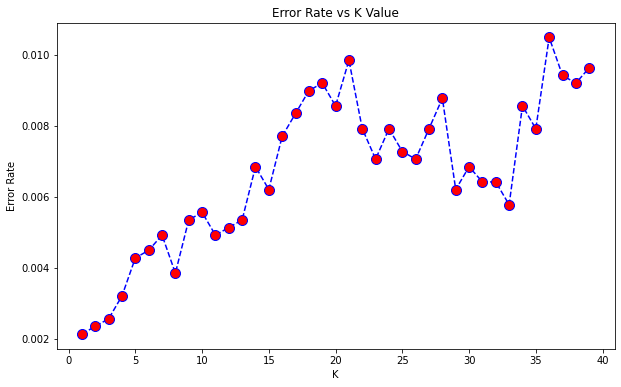

In [102]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [103]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [104]:
print(confusion_matrix(y_test, pred))

[[2463    6]
 [   4 2201]]


In [105]:
#able to predict with 100% accuracy a positive or negative rating based on genre, platform and tm
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      2469
         2.0       1.00      1.00      1.00      2205

    accuracy                           1.00      4674
   macro avg       1.00      1.00      1.00      4674
weighted avg       1.00      1.00      1.00      4674



In [119]:
#Predict Rating based on genre, platform
sd4 = sd3.drop(['tmdb_score'], axis=1)

In [120]:
sd4.head()

,genre,Platform
0,9,2
1,2,2
2,2,2
3,2,2
4,9,2


In [113]:
scaler1 = StandardScaler()
scaler1.fit(sd4)
scaledVariables1 = scaler.transform(sd4)
sd4scaled = pd.DataFrame(scaledVariables1)

C:\Python3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- tmdb_score

  warnings.warn(message, FutureWarning)


ValueError: X has 2 features, but StandardScaler is expecting 3 features as input.

In [110]:
sd4scaled.head()

NameError: name 'sd4scaled' is not defined

In [ ]:
sd4scaled.rename(columns={0: 'Genre', 1: 'Platform'}, inplace=True)

In [ ]:
sd4scaled.head()

In [ ]:
x = sd4scaled
y = sd2['Rating1']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size = 0.3, random_state = 101)

In [121]:
#anaylis and interpretation
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))

Text(0, 0.5, 'Error Rate')

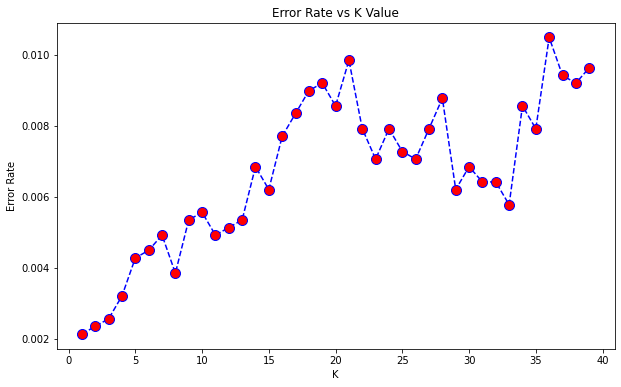

In [122]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [126]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [128]:
print(confusion_matrix(y_test, pred))

[[2463    6]
 [   4 2201]]


In [129]:
#able to predict with 69% accuracy a positive rating and a 64% negative rating based on genre and platform with an overall
#predicition of 67%
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      2469
         2.0       1.00      1.00      1.00      2205

    accuracy                           1.00      4674
   macro avg       1.00      1.00      1.00      4674
weighted avg       1.00      1.00      1.00      4674

